# EDA on EPL Results(1993-2018)

 ### **About EPL**

The Premier League (often referred to as the English Premier League (EPL) outside England) is the top level of the English football league system. Contested by 20 clubs, it operates on a system of promotion and relegation with the English Football League (EFL).

The Premier League is a corporation in which the member clubs act as shareholders. Seasons run from August to May with each team playing 38 matches (playing all 19 other teams both home and away). Most games are played on Saturday and Sunday afternoons. The Premier League has featured 47 English and two Welsh clubs since its inception, making it a cross-border league.

The competition was formed as the FA Premier League on 20 February 1992 following the decision of clubs in the Football League First Division to break away from the Football League, founded in 1888, and take advantage of a lucrative television rights deal. The deal was worth £1 billion a year domestically as of 2013–14, with Sky and BT Group securing the domestic rights to broadcast 116 and 38 games respectively.The league generates €2.2 billion per year in domestic and international television rights.Clubs were apportioned central payment revenues of £2.4 billion in 2016–17, with a further £343 million in solidarity payments to English Football League (EFL) clubs.

The Premier League is the most-watched sports league in the world, broadcast in 212 territories to 643 million homes and a potential TV audience of 4.7 billion people. In 2010, the league was awarded the Queen's Award for Enterprise in recognition for its outstanding contribution to international trade.In the 2014–15 season, the average Premier League match attendance exceeded 36,000, second highest of any professional football league behind the Bundesliga's 43,500. Most stadium occupancies are near capacity. The Premier League ranks second in the UEFA coefficients of leagues based on performances in European competitions over the past five seasons, as of 2018.

Forty-nine clubs have competed since the inception of the Premier League in 1992. Six of them have won the title since then: Manchester United (13), Chelsea (5), Manchester City (4), Arsenal (3), Blackburn Rovers (1), and Leicester City (1). The record of most points in a Premier League season is 100, set by Manchester City in 2017–18.(credits:https://en.wikipedia.org/wiki/Premier_League) 

## ***Import the Libraries***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## ***Load the Data***

In [8]:
epl=pd.read_csv('EPL_Set.csv')

In [9]:
epl.head()

,Date,HomeTeam,AwayTeam,HomeTeamGoals,AwayTeamGoals,Result,Season
0,14-08-1993,Arsenal,Coventry,0,3,A,1993-94
1,14-08-1993,Aston Villa,QPR,4,1,H,1993-94
2,14-08-1993,Chelsea,Blackburn,1,2,A,1993-94
3,14-08-1993,Liverpool,Sheffield Weds,2,0,H,1993-94
4,14-08-1993,Man City,Leeds,1,1,D,1993-94


In [10]:
conditions=[epl['Result']=='A',epl['Result']=='H',epl['Result']=='D']
choices = [epl['AwayTeam'],epl['HomeTeam'],'Draw']
epl['Winner']=np.select(conditions,choices)

In [11]:
epl['Total_Goals']=epl['HomeTeamGoals']+epl['AwayTeamGoals']
epl.head()

,Date,HomeTeam,AwayTeam,HomeTeamGoals,AwayTeamGoals,Result,Season,Winner,Total_Goals
0,14-08-1993,Arsenal,Coventry,0,3,A,1993-94,Coventry,3
1,14-08-1993,Aston Villa,QPR,4,1,H,1993-94,Aston Villa,5
2,14-08-1993,Chelsea,Blackburn,1,2,A,1993-94,Blackburn,3
3,14-08-1993,Liverpool,Sheffield Weds,2,0,H,1993-94,Liverpool,2
4,14-08-1993,Man City,Leeds,1,1,D,1993-94,Draw,2


***Number of Matches Won by teams in every Season***

In [13]:
epl[['Season','Winner']].groupby(['Season','Winner']).size().reset_index(name='Count').sort_values(['Season', 'Count'],
                                                                                                   ascending=[True, False])

,Season,Winner,Count
5,1993-94,Draw,142
11,1993-94,Man United,27
2,1993-94,Blackburn,25
12,1993-94,Newcastle,23
0,1993-94,Arsenal,18
8,1993-94,Leeds,18
22,1993-94,Wimbledon,18
9,1993-94,Liverpool,17
15,1993-94,QPR,16
17,1993-94,Sheffield Weds,16


***Now we can see that draw is topping every seasons count so we must remove draw from the list and find the team with the most number of wins in every season***

In [18]:
most_wins=epl[['Season','Winner']].groupby(['Season','Winner']).size().reset_index(name='Count').sort_values(['Season', 'Count'], ascending=[True, False])
most_wins=most_wins[most_wins['Winner'].str.contains('Draw')==False].groupby('Season').head(1)
most_wins

,Season,Winner,Count
11,1993-94,Man United,27
25,1994-95,Blackburn,27
57,1995-96,Man United,25
78,1996-97,Man United,21
88,1997-98,Arsenal,23
109,1998-99,Arsenal,22
141,1999-00,Man United,28
165,2000-01,Man United,24
172,2001-02,Arsenal,26
206,2002-03,Man United,25


***Now we have the each seasons most winners list , using this we can find out which team has topped the list across all seasons most number of times***

In [19]:
most_wins['Winner'].value_counts()

Man United    11
Chelsea        5
Arsenal        4
Man City       3
Blackburn      1
Leicester      1
Name: Winner, dtype: int64

***As expected Manchester United have won the most matches in 11 seasons as they were dominating the Premier League till 2013***

***Now we can create a chart to find the Home and Away Wins and Draws for every season***

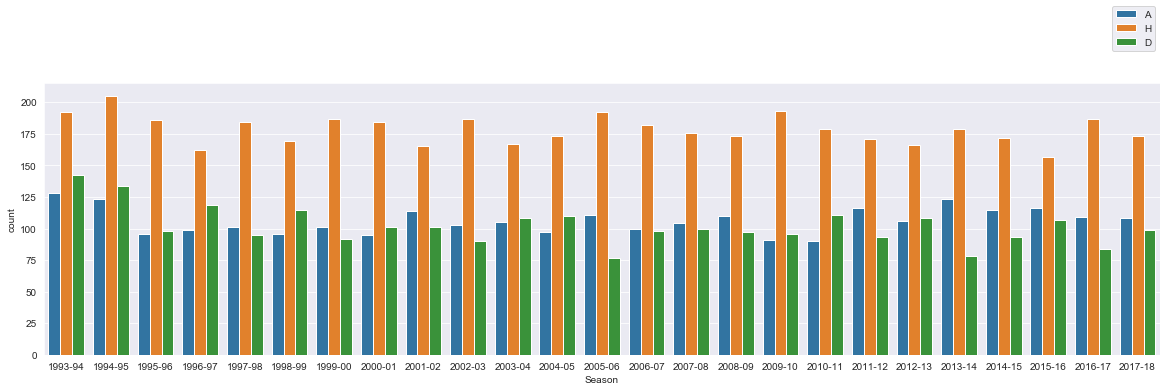

In [25]:
plt.figure(figsize=(20,5))
sns.set_style('darkgrid')
sns.countplot(x='Season',hue='Result',data=epl)
plt.legend(bbox_to_anchor=(1, 1.3))

***Teams have made most use of the home conditions as the Home Wins Tops in every season***

***We can create a distribution plot for total goals across all seasons***

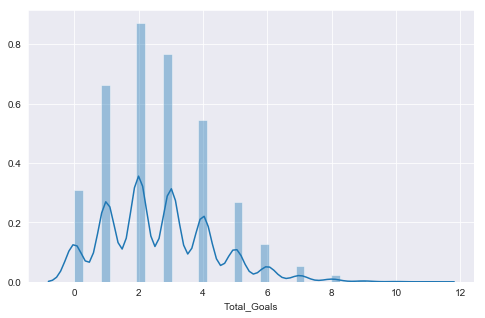

In [29]:
plt.figure(figsize=(8,5))
sns.distplot(epl['Total_Goals'])

***We can now create a graph for the Total number of goals scored across seasons***

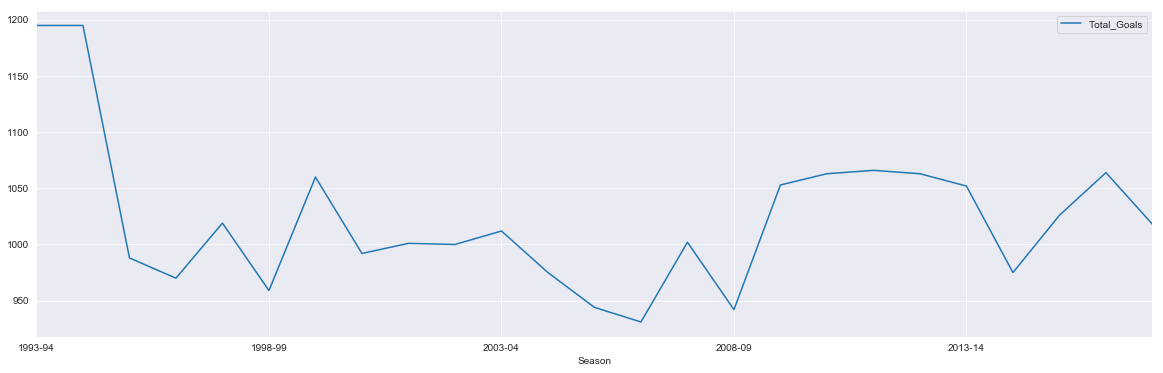

In [31]:
epl[['Season','Total_Goals']].groupby('Season').sum().plot(figsize=(20,6))

***The scoring rate have gradually decreased and has reached a low point between 2003-04 to 2008-09 season but from then have picked up***

***Some basic analysis on the  dataset has been performed and as Manchester United is my favourite team will perform analysis on their  performances across seasons***

### Manchester United

Manchester United Football Club is a professional football club based in Old Trafford, Greater Manchester, England, 
that competes in the Premier League, the top flight of English football. Nicknamed "the Red Devils", the club was 
founded as Newton Heath LYR Football Club in 1878, changed its name to Manchester United in 1902 and 
moved to its current stadium, Old Trafford, in 1910. 

Manchester United have won more trophies than any other club in English football, with a record 20 League titles, 12 FA Cups, 5 League Cups and a record 21 FA Community Shields. United have also won 3 UEFA Champions Leagues, 1 UEFA Europa League, 1 UEFA Cup Winners' Cup, 1 UEFA Super Cup, 1 Intercontinental Cup and 1 FIFA Club World Cup. In 1998–99, the club became the first in the history of English football to achieve the continental European treble.By winning the UEFA Europa League in 2016–17, they became one of five clubs to have won all three main UEFA club competitions.

The 1958 Munich air disaster claimed the lives of eight players. In 1968, under the management of Matt Busby, Manchester United became the first English football club to win the European Cup. Alex Ferguson won 38 trophies as manager, including 13 Premier League titles, 5 FA Cups and 2 UEFA Champions Leagues, between 1986 and 2013,when he announced his retirement.

Manchester United was the highest-earning football club in the world for 2016–17, with an annual revenue of €676.3 million, and the world's most valuable football club in 2018, valued at £3.1 billion. As of June 2015, it is the world's most valuable football brand, estimated to be worth $1.2 billion. After being floated on the London Stock Exchange in 1991, the club was purchased by Malcolm Glazer in May 2005 in a deal valuing the club at almost £800 million, after which the company was taken private again, before going public once more in August 2012, when they made an initial public offering on the New York Stock Exchange. Manchester United is one of the most widely supported football clubs in the world, and has rivalries with Liverpool, Manchester City, Arsenal and Leeds United. (credits=https://en.wikipedia.org/wiki/Manchester_United_F.C.)





In [32]:
man_utd=epl[(epl['HomeTeam']=='Man United')| (epl['AwayTeam']=='Man United')]

In [33]:
man_utd.head()

,Date,HomeTeam,AwayTeam,HomeTeamGoals,AwayTeamGoals,Result,Season,Winner,Total_Goals
10,15-08-1993,Norwich,Man United,0,2,A,1993-94,Man United,2
18,18-08-1993,Man United,Sheffield United,3,0,H,1993-94,Man United,3
27,21-08-1993,Man United,Newcastle,1,1,D,1993-94,Draw,2
33,23-08-1993,Aston Villa,Man United,1,2,A,1993-94,Man United,3
52,28-08-1993,Southampton,Man United,1,3,A,1993-94,Man United,4


***Number of wins by Manchester United across all seasons***

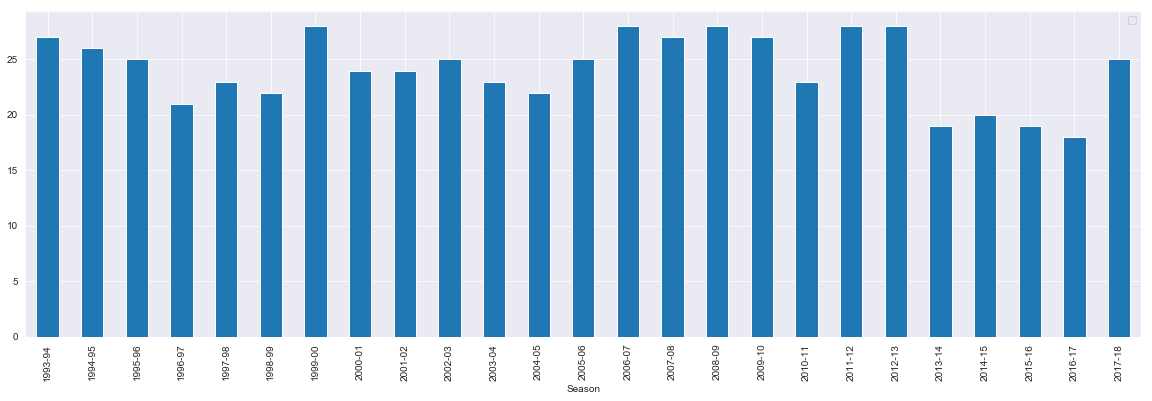

In [35]:
man_utd[man_utd['Winner']=='Man United'][['Season','Winner']].groupby('Season').count().plot(kind='bar',figsize=(20,6))
plt.legend("")

***We can clearly see the downfall of United started once Sir Alex Ferguson retired and at the 2017-18 season they finally got back to winnig  ways finishing 2nd in the league***

***Amount of homegoals scored by United across seasons***

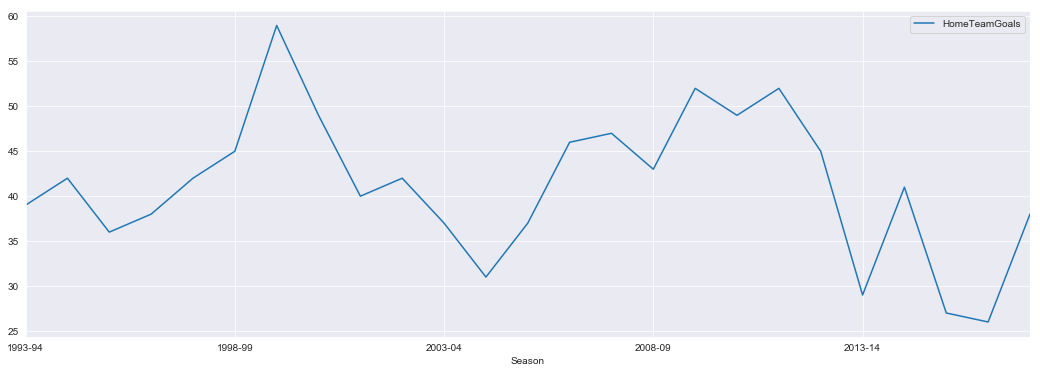

In [36]:
man_utd[man_utd['HomeTeam']=='Man United'][['Season','HomeTeamGoals']].groupby('Season').sum().plot(figsize=(18,6))

***Now we can create a graph to find the avrage home team goals by all teams and by United across all seasons***

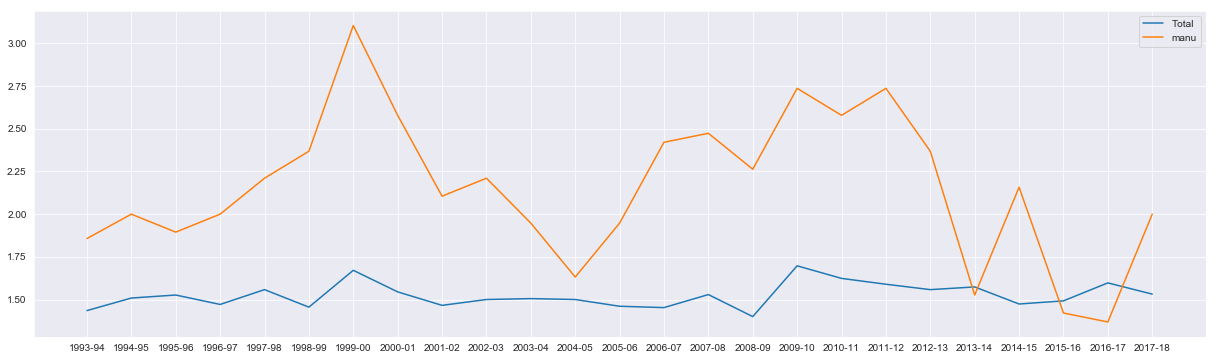

In [37]:
plt.figure(figsize=(21,6))
epl1=epl[['Season','HomeTeamGoals']].groupby('Season').mean()
man1=man_utd[man_utd['HomeTeam']=='Man United'][['Season','HomeTeamGoals']].groupby('Season').mean()
plt.plot(epl1,label='Total')
plt.legend()
plt.plot(man1,label='manu')
plt.legend()

***Amount of homegoals scored by United across seasons***

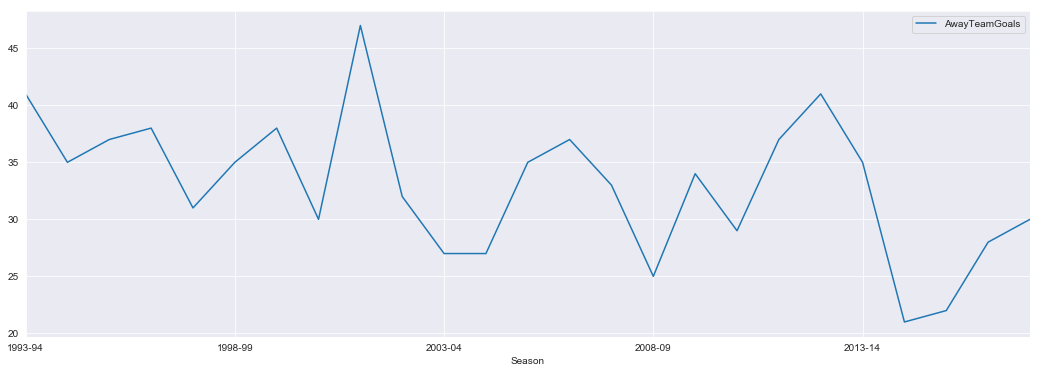

In [38]:
man_utd[man_utd['AwayTeam']=='Man United'][['Season','AwayTeamGoals']].groupby('Season').sum().plot(figsize=(18,6))

***Now we can create a graph to find the avrage home team goals by all teams and by United across all seasons***

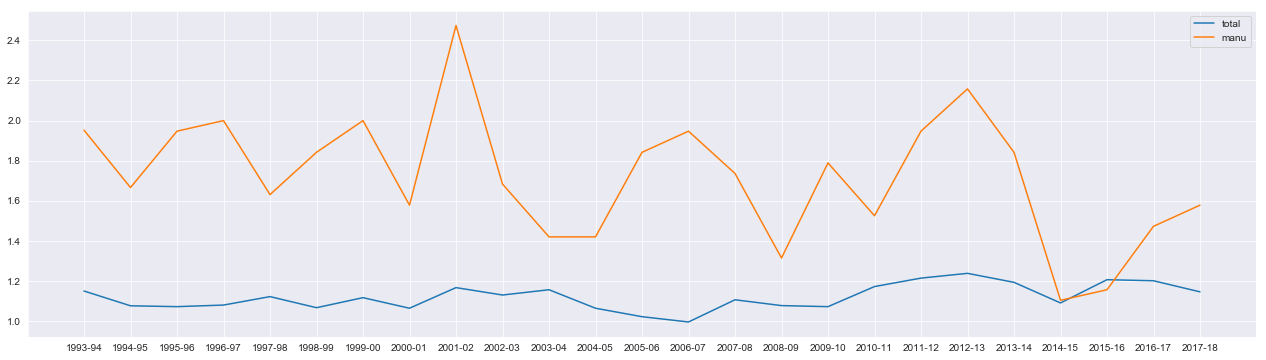

In [39]:
plt.figure(figsize=(22,6))
epl1=epl[['Season','AwayTeamGoals']].groupby('Season').mean()
man1=man_utd[man_utd['AwayTeam']=='Man United'][['Season','AwayTeamGoals']].groupby('Season').mean()
plt.plot(epl1,label='total')
plt.legend()
plt.plot(man1,label='manu')
plt.legend()

***We can now see how United have fared against their top 4 opponents and the average numer of goals scored during those matches***

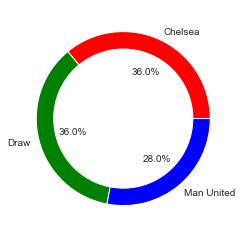

In [47]:
my_circle=plt.Circle( (0,0), 0.8, color='white')
epl[((epl['HomeTeam']=='Man United' )& (epl['AwayTeam']=='Chelsea'))|((epl['HomeTeam']=='Chelsea') & (epl['AwayTeam']=='Man United'))].groupby(['Winner'])['Winner'].count().plot(kind='pie',autopct='%1.1f%%',colors=['red','green','blue','skyblue'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.ylabel('')
plt.show()

In [51]:
epl[((epl['HomeTeam']=='Man United' )& (epl['AwayTeam']=='Chelsea'))|((epl['HomeTeam']=='Chelsea') & (epl['AwayTeam']=='Man United'))]['Total_Goals'].mean()

2.52

***Surprisingly Chelsea has lead over United in the number of wins***

***Now we can look at how United have fared against its main rival Liverpool***

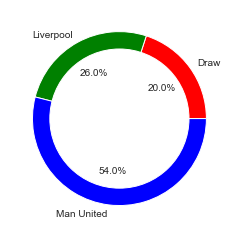

In [48]:
my_circle=plt.Circle( (0,0), 0.8, color='white')
epl[((epl['HomeTeam']=='Man United' )& (epl['AwayTeam']=='Liverpool'))|((epl['HomeTeam']=='Liverpool') & (epl['AwayTeam']=='Man United'))].groupby(['Winner'])['Winner'].count().plot(kind='pie',autopct='%1.1f%%',colors=['red','green','blue','skyblue'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.ylabel('')
plt.show()

In [52]:
epl[((epl['HomeTeam']=='Man United' )& (epl['AwayTeam']=='Liverpool'))|((epl['HomeTeam']=='Liverpool') & (epl['AwayTeam']=='Man United'))]['Total_Goals'].mean()

2.5

***As expected United although not being in form in recent days have maintained a strong lead against Liverpool in the number of wins***

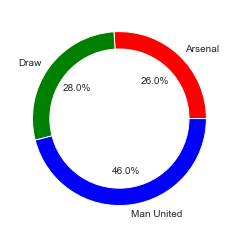

In [49]:
my_circle=plt.Circle( (0,0), 0.8, color='white')
epl[((epl['HomeTeam']=='Man United' )& (epl['AwayTeam']=='Arsenal'))|((epl['HomeTeam']=='Arsenal') & (epl['AwayTeam']=='Man United'))].groupby(['Winner'])['Winner'].count().plot(kind='pie',autopct='%1.1f%%',colors=['red','green','blue','skyblue'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.ylabel('')
plt.show()

In [53]:
epl[((epl['HomeTeam']=='Man United' )& (epl['AwayTeam']=='Arsenal'))|((epl['HomeTeam']=='Arsenal') & (epl['AwayTeam']=='Man United'))]['Total_Goals'].mean()

2.54

***Arsene Wenger vs Sir Alex was always very interesting to watch and the Scott has maintained a very good lead over the Frenchman***

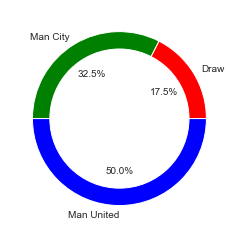

In [50]:
my_circle=plt.Circle( (0,0), 0.8, color='white')
epl[((epl['HomeTeam']=='Man United' )& (epl['AwayTeam']=='Man City'))|((epl['HomeTeam']=='Man City') & (epl['AwayTeam']=='Man United'))].groupby(['Winner'])['Winner'].count().plot(kind='pie',autopct='%1.1f%%',colors=['red','green','blue','skyblue'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.ylabel('')
plt.show()

In [54]:
epl[((epl['HomeTeam']=='Man United' )& (epl['AwayTeam']=='Man City'))|((epl['HomeTeam']=='Man City') & (epl['AwayTeam']=='Man United'))]['Total_Goals'].mean()

2.825

***United record against its noisy neighbours is good but the current City team is miles ahead of United in terms of quality and we can expect the lead to be cut short in following seasons***

***The teams against which United have got most number of home wins***

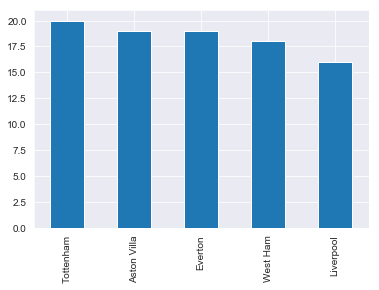

In [58]:
epl[(epl['Winner']=='Man United')&(epl['HomeTeam']=='Man United')]['AwayTeam'].value_counts().head().plot(kind='bar')
plt.show()

***The teams against which United have got most number of away wins***

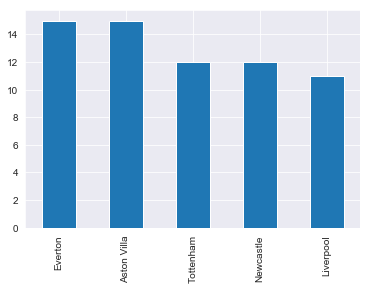

In [59]:
epl[(epl['Winner']=='Man United')&(epl['AwayTeam']=='Man United')]['HomeTeam'].value_counts().head().plot(kind='bar')
plt.show()